In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.randn()

-0.33926124978505134

In [ ]:
N = 100
x = np.linspace(0, 1, N)
y_truth =  - 10 * (x - 0.5) ** 2 + 3
y = y_truth + 0.5 * np.random.randn(N)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.DataFrame({"x": x, "y": y})
df.head()

,x,y
0,0.000000,0.650897
1,0.010101,-0.508818
2,0.020202,0.377456
3,0.030303,0.842219
4,0.040404,1.129471


- `y = coeff_1 * x + intercept`
- `y = coeff_1 * x + coeff_2 * x^2 + intercept`

...

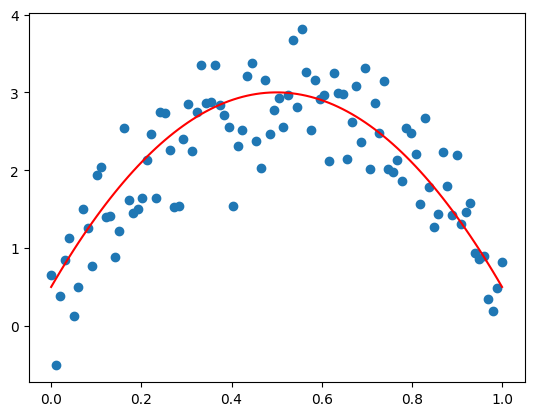

In [ ]:
plt.plot(x, y_truth, c='r');
plt.scatter(x, y);

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
X = x.reshape(-1, 1)
X.shape, y.shape

((100, 1), (100,))

In [ ]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=30, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])
pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=30, include_bias=False)),
                ('ridge', Ridge(alpha=0.1))])

In [ ]:
pred = pipe.predict(X)
mean_absolute_error(y, pred)

0.387777824219012

In [ ]:
x_to_plot_pred = np.linspace(0, 1, 10_000)
pred = pipe.predict(x_to_plot_pred.reshape(-1, 1))

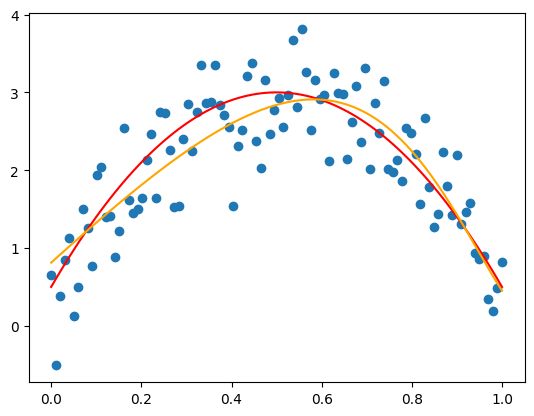

In [ ]:
plt.plot(x, y_truth, c='r');
plt.scatter(x, y);
plt.plot(x_to_plot_pred, pred, c='orange');

In [ ]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

Alpha:  0.0 Coefficients:  [-4.41150903e+02  5.18400469e+04 -2.47193957e+06  6.43010138e+07
 -1.03617936e+09  1.11567948e+10 -8.42323607e+10  4.59625369e+11
 -1.84244053e+12  5.43997632e+12 -1.16490885e+13  1.72010994e+13
 -1.49166216e+13  1.69808470e+12  1.18755105e+13 -9.74815159e+12
 -5.66793894e+12  1.18660787e+13  5.71169119e+11 -1.19756556e+13
  5.07453924e+12  9.51761449e+12 -1.40537256e+13  8.47623093e+12
 -2.57867717e+12  3.26420651e+11] 


Alpha:  0.001 Coefficients:  [ 9.40883066 -7.27003103 -2.32481716 -1.04471298 -0.69364563 -0.0703074
  0.76224456  1.49188199  1.89943265  1.91168077  1.56529856  0.95705722
  0.2043652  -0.57967916 -1.29922897 -1.88048462 -2.27167041 -2.44055078
 -2.37097543 -2.05930532 -1.51115281 -0.7386155   0.24195904  1.41171307
  2.75058973  4.2382904 ] 


Alpha:  0.01 Coefficients:  [ 7.84635269 -3.97008517 -3.6538634  -1.80052055 -0.33349529  0.5433495
  0.94798489  1.02842825  0.90541804  0.6683114   0.38100597  0.08810601
 -0.18023457 -0.40465014

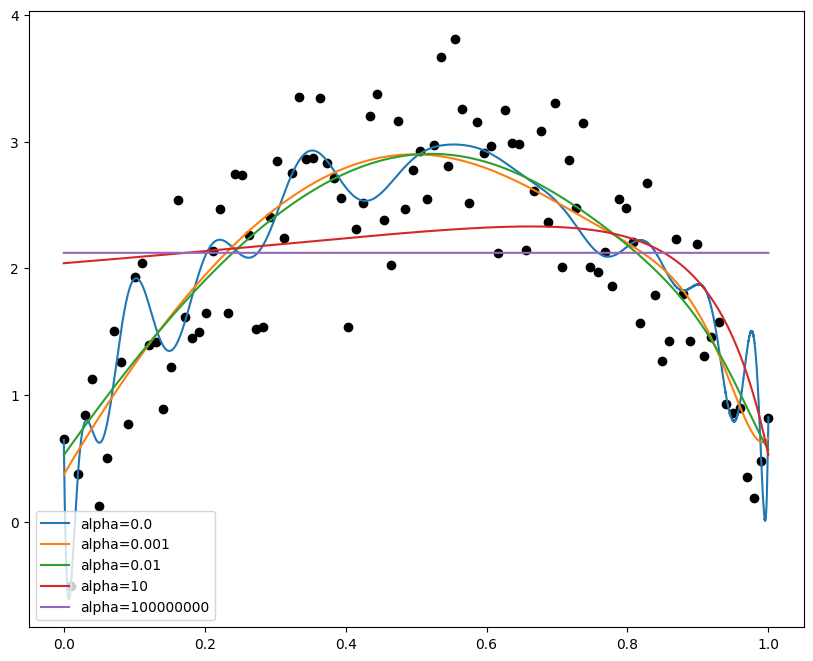

In [ ]:
alpha_vec = [0.0, 0.001, 0.01, 10, 100_000_000]
mae_error = []

fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(x, y_truth, c='r');
ax.scatter(x, y, c='black');

for alpha in alpha_vec:
    # print(alpha)

    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)
    pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=26, include_bias=False)),
    ('ridge', model)
    ])
    pipe.fit(X_train, y_train)
    print("Alpha: ", alpha, "Coefficients: ", pipe.steps[1][1].coef_, "\n\n")

    pred = pipe.predict(X_test)
    error = mean_absolute_error(y_test, pred)
    mae_error.append(error)

    to_plot_pred = pipe.predict(x_to_plot_pred.reshape(-1, 1))
    ax.plot(x_to_plot_pred, to_plot_pred, label=f'alpha={alpha}')
plt.legend(loc=3)
plt.show()

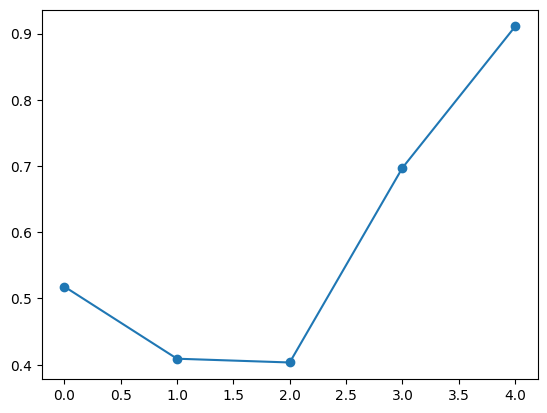

In [ ]:
plt.plot(mae_error, 'o-');

In [ ]:
alpha_vec[np.argmin(mae_error)], np.min(mae_error)

(0.01, 0.4033536129055489)

In [ ]:
mae_error

[0.5180157630167799,
 0.40903878038951313,
 0.4033536129055489,
 0.6972484632046447,
 0.910650781799961]